# Fichier: LECTURE ET ANALYSE DES CLUSTERS EN STOCK
### Importation des librairies

In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline

from tslearn.clustering import silhouette_score

from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km
from utils import k_shape as ks
from utils.statics_func import *

2.5.1


### Initialise la factory et créé les instances de Support de Series: ss.SeriesSupp

In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


### Importation des datasets depuis les fichiers de stockage csv

In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


### Création des instances de Clustering
Commenter ou décommenter pour choisir le cluster_GW voulu selon Kshape ou Kmean
* GW: Grand Water -> les piezomètres
* RG: Rain gauge -> les pluviomètres

In [4]:
#cluster_GW = km.Kmean(GW)
cluster_GW = ks.Kshape(GW)
cluster_RG = km.Kmean(RG24)

## Importation du fichier Pickles contenant le clustering voulu
### Veuillez renseigner le nom du fichier ci dessous

In [5]:
name_file = openfile_dialog()

In [6]:
#name_file = "Kshape_GW_[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015][5, 6, 7, 8]_True_10"

In [7]:
name_file[0]

"C:/Users/utilisateur/workspace_stage/cluster/13_06/Kshape_GW_[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]['9', '10', '11']_True_5.pkl"

In [8]:
cluster_GW.read_cluster(name_file[0])

## Affichage des cluster
* Prototypes en rouge
* informations en dessous
* repartition des objets dans les cluster

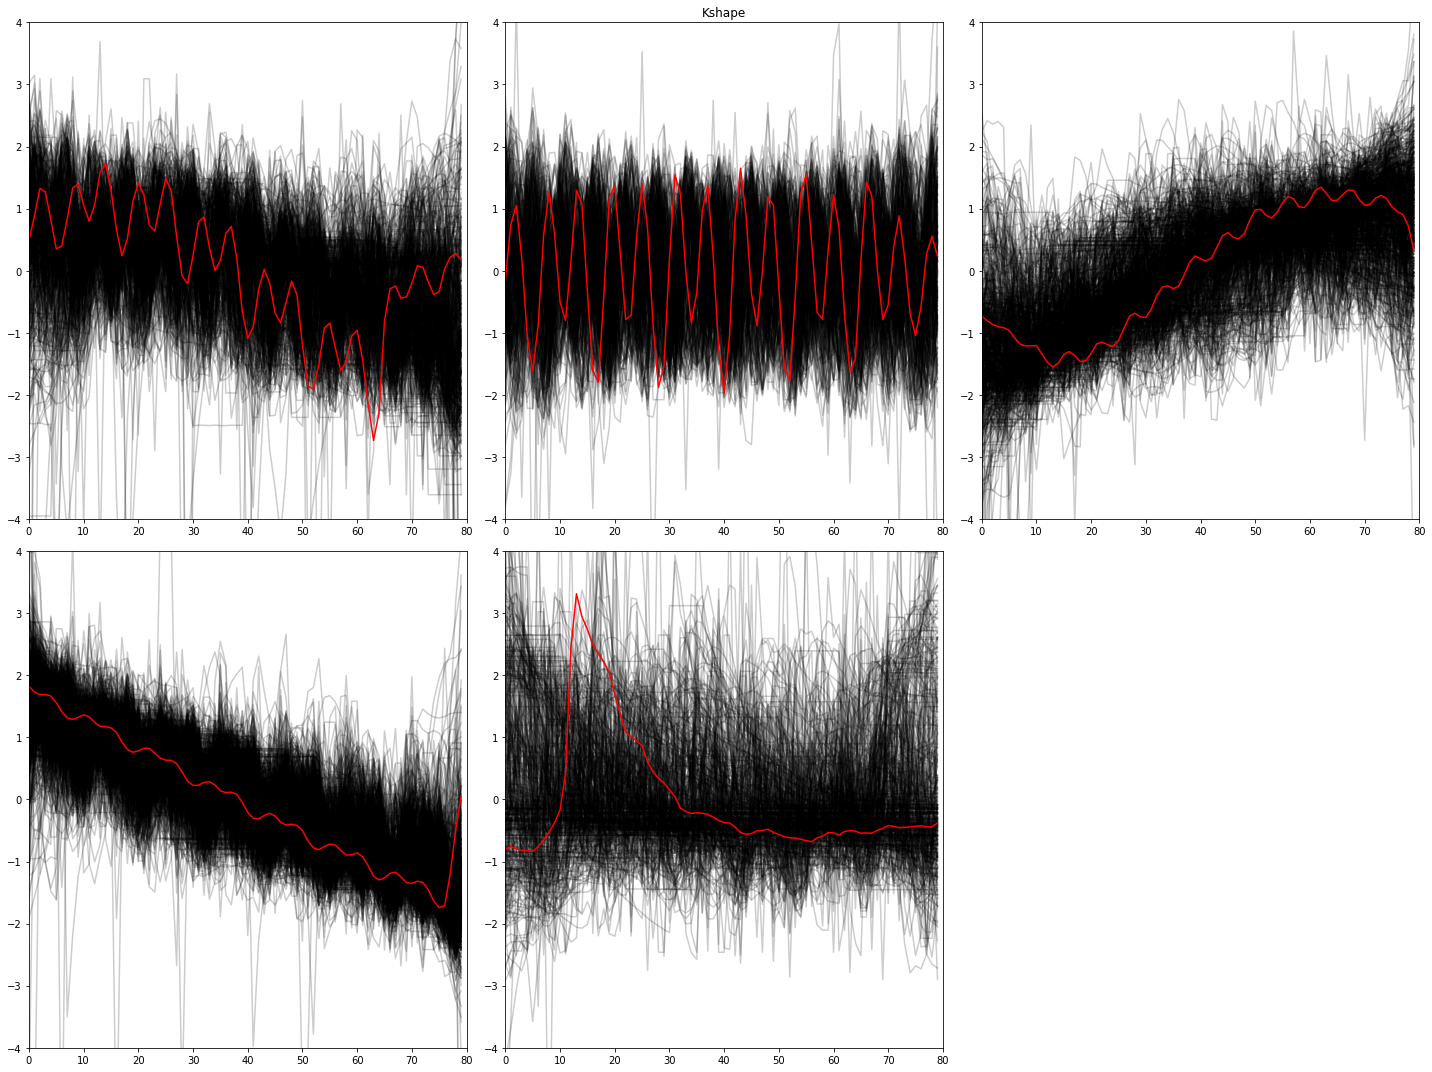

Counter({2: 755, 3: 1699, 1: 303, 4: 428, 0: 491})

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
['9', '10', '11']
Weeks split: True
Normalized: True
min size of TS selected: 80
Sample size(0=None): 80
Algorithm used: Kshape
nb cluster: 5
Distance measure: shape

tot obj: 3676


,0,1,2,3,4
GW011,25,8,18,52,2
GW015,8,1,25,82,7
GW082,11,1,38,60,7
GW126,10,15,14,16,17
GW190,13,nan,4,8,38
GW201,14,nan,20,21,11
GW202,7,nan,42,57,4
GW203,17,3,36,57,1
GW204,7,nan,18,36,6
GW205,8,nan,19,33,20


In [9]:
cluster_GW.ploter.plot_cluster_light()
cluster_GW.show_info()
cluster_GW.cluster_counter()
cluster_GW.counter
print("tot obj: " + str(len(cluster_GW.ts_clust)))
cluster_GW.capteur_parser()
cluster_GW.style_df("max", cluster_GW.get_captor_distribution_in_cluster())

In [10]:
cluster_GW.ploter.change_mode(3)
#cluster_GW.cluster_by_fullname

### Silhouette score cluster quality indice
could be huge and long computation due to massive dataset

In [11]:
#sil = silhouette_score(cluster_GW.ts, cluster_GW.ts_clust, metric="softdtw", metric_params = {"gamma_sdtw": .01})
#print("Silhouette score: " + str(sil))

## Analyse: n_obs est le numero du cluster à observer

### n_obs: numéro du cluster analysé 

In [12]:
n_obs = 0
cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[n_obs])
cluster_GW.geo.distance_matrix()
cluster_GW.ploter.plot_histo_2(n_obs)
cluster_GW.clust_hoverview(n_obs)

,RG007,RG009,RG010,RG011,RG012,RG013,RG014,RG017,RG018,RG019,RG023,RG024,RG026,RG027,RG028
GW011,9881.9,5441,3728.1,3876.6,5281.4,3049.9,6818.7,17636.1,2461.5,1618.1,4250.1,2599.5,980.8,6080.7,3104.7
GW071,989.8,9556.7,9693.1,12653.8,6752.1,6833.3,2639,16424,6499.8,9401.5,10275.1,11033.2,8411.7,3099.6,10284.2
GW082,1342.8,11294.3,11680.6,14969.1,8487.3,8955.2,4616.9,17343.2,8766.8,11594.4,12235,13245.9,10668.7,5420.9,12383.1
GW126,11103.7,3389.1,1487.2,4698,4663.8,3432.8,7751.2,20408.1,4083.6,1232,1792.2,1628.9,2566.1,7845.9,730.2
GW190,11096.4,3409.1,1505.7,4677.9,4669.7,3425.8,7745.3,20383.4,4067.8,1209.2,1814.7,1613.3,2545,7832.3,741.2
GW200,2217.4,12217,12612.5,15828.8,9415.1,9882.1,5547.9,17334,9659.4,12509,13169.9,14160.8,11569.7,6228,13313.8
GW201,1714,11830.4,12170.9,15298.2,9020.7,9407.1,5088.1,17009.1,9147.3,12017.4,12735.6,13664.9,11061,5686.2,12846.9
GW202,1691.7,11802.5,12145.3,15280.6,8993,9383.3,5063.1,17025.6,9126.9,11995,12709.5,13642.8,11040.1,5671.1,12822.6
GW203,1732.1,11824.6,12175.8,15328.6,9016,9419.5,5096.1,17076.8,9170.4,12034.4,12738.9,13683,11082.9,5722.6,12857.5
GW204,2285.2,12241.6,12653.1,15904.3,9442.5,9934.2,5596.5,17438.5,9725.9,12566.8,13208.2,14220.2,11634.5,6311.9,13362.7


KeyError: '2010-27'

In [ ]:
cluster_RG.ss.reset_dataset()
cluster_RG.ss.years = cluster_GW.ss.years
cluster_RG.ss.months = cluster_GW.ss.months

In [ ]:
cluster_RG.ss.split_data_years()
cluster_RG.ss.split_data_months()
#if cluster_GW.ss.days:
#    cluster_RG.ss.split_data_weeks()

In [ ]:
cluster_RG.ploter.change_mode(3)
cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

In [ ]:
#for k, v in cluster_GW.ss.dataset.items():
#    print(k)

## Recherche et test sur le SAX

In [ ]:
from prefixspan import PrefixSpan
from utils import sax_engine as sq
from utils import prefix_span as ps

In [ ]:
se = sq.SaxEngine(5, 40)

In [ ]:
se.reset()

In [ ]:
se.set_nb_symbol(5)
se.set_nb_segment(40)

In [ ]:
all_ts = cluster_GW.get_cluster_n(n_obs)

In [ ]:
se.fit(all_ts)
se.run()

In [ ]:
psm = ps.PrefixSpanManager(se)

In [ ]:
psm.run()

In [ ]:
#psm.frequent(4)

In [ ]:
psm.ps.topk(5, closed=True)

In [ ]:
psm.plot(psm.topk(20))

In [ ]:
n = 0

In [ ]:
traw = psm.se_instance.raw_data[n]
traw.shape

In [ ]:
tinv = psm.se_instance.sax_data_inv[n]
tstr = psm.se_instance.sax_data[n]
tinv.shape

In [ ]:
#tinv

In [ ]:
#len(psm.se_instance.sax_data_inv)
#len(psm.se_instance.sax_data)
#len(psm.se_instance.raw_data)
tinv.ravel()
tstr.ravel()
#len(traw)

In [ ]:
plt.plot(traw.ravel(), "b-", alpha=0.4)
plt.plot(tinv.ravel(), "b-")
plt.plot(tstr.ravel(), "r-")